In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Oversampling Convert
##### This code is used to convert the final probability from oversampled population to the actual probability in the original population

- Define 
  - `odds = p/(1-p)`
  - `p = 1/(1+1/odds)`

- The original odds of the target value is:
`original_odds = original_fraction/(1 - original_fraction)`

- The oversampled odds is: 
`oversampled_odds = oversampled_fraction/(1 - oversampled_fraction)`

- The scoring odds is:
`scoring_odds = scoring_results / (1 - scoring_results)`

- Now define:
    - `adjusted_odds = scoring_odds * (original_odds / oversampled_odds)`
    - `adjusted_probability = 1/(1 + 1/adjusted_odds)`

<img src="PNG/Oversample.PNG">

In [7]:
def Oversample_Convert(df, org_event_ratio, oversample_event_ratio, prob_model_event):
    
# Parameter Instruction:
    # df: Pandas DataFrame which has oversampled model prediction column (prob_model_event)
    # org_event_ratio: original % of events
    # oversample_event_ratio: oversampled % of events
    # prob_model_event: the model prediction from the oversampled population
    
    df['prob_adjust_event'] = df[prob_model_event].map(lambda x: 1/(1+((1/org_event_ratio)-1)/((1/oversample_event_ratio)-1)*((1/x)-1)))
    
    df['prob_model_noevent'] = df[prob_model_event].map(lambda x: 1 - x)
    org_noevent_ratio = 1 - org_event_ratio
    oversample_noevent_ratio = 1 - oversample_event_ratio
    df['prob_adjust_noevent'] = df['prob_model_noevent'].map(lambda x: 1/(1+((1/org_noevent_ratio)-1)/((1/oversample_noevent_ratio)-1)*((1/x)-1)))
    
    return df

##### Example

In [5]:
df = pd.DataFrame(np.linspace(0.01,0.99,99)
                 ,columns=['prob_model_event'])
df.tail()

,prob_model_event
94,0.95
95,0.96
96,0.97
97,0.98
98,0.99


In [8]:
Oversample_Convert(df = df
                  ,org_event_ratio = 0.1
                  ,oversample_event_ratio = 0.5
                  ,prob_model_event = 'prob_model_event')

,prob_model_event,prob_adjust_event,prob_model_noevent,prob_adjust_noevent
0,0.01,0.001121,0.99,0.998879
1,0.02,0.002262,0.98,0.997738
2,0.03,0.003425,0.97,0.996575
3,0.04,0.004608,0.96,0.995392
4,0.05,0.005814,0.95,0.994186
5,0.06,0.007042,0.94,0.992958
6,0.07,0.008294,0.93,0.991706
7,0.08,0.009569,0.92,0.990431
8,0.09,0.010870,0.91,0.989130
9,0.10,0.012195,0.90,0.987805


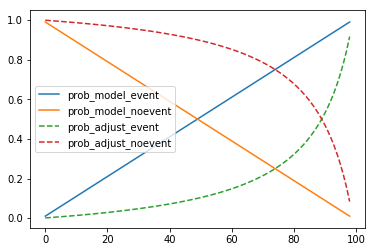

In [9]:
# Verify the correctness of this function by plotting
plt.plot(df['prob_model_event'])
plt.plot(df['prob_model_noevent'])
plt.plot(df['prob_adjust_event'], linestyle = 'dashed')
plt.plot(df['prob_adjust_noevent'], linestyle = 'dashed')
plt.legend()

The sum of "P(event)" and "P(no event)" is always be 1, which indicates calculation is correct.